In [1]:
# Bagian 1: Instalasi Library yang Diperlukan
!pip install ultralytics roboflow -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/12

In [2]:
# Bagian 2: Import Library
import os
import glob
import shutil
from ultralytics import YOLO
from roboflow import Roboflow # Sudah diimpor di sini, jadi tidak perlu diulang di bagian 3
import torch # Untuk memeriksa ketersediaan GPU

# Memastikan environment menggunakan GPU jika tersedia di Colab
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PyTorch version: 2.6.0+cu124
CUDA available: True
CUDA version: 12.4
Using device: cuda


In [3]:
# Bagian 3: Download Dataset dari Roboflow (Menggunakan Kode Spesifik Anda)
print("Mengunduh dataset dari Roboflow menggunakan kode spesifik Anda...")
dataset_yaml_path = None # Inisialisasi
dataset_location = None # Inisialisasi

try:
    # Kode dari Anda:
    # !pip install roboflow # Tidak perlu diulang jika sudah di Bagian 1
    # from roboflow import Roboflow # Tidak perlu diulang jika sudah di Bagian 2

    rf = Roboflow(api_key="p7beh7c2wbFUMQ1TDVkM") # API Key Anda
    project = rf.workspace("nuritzan").project("deteksi-alfabet-sibi") # Detail workspace dan project Anda
    version = project.version(1) # Versi dataset Anda
    dataset = version.download("yolov8") # Mengunduh dataset dengan format YOLOv8

    # Mendapatkan lokasi dataset dan path ke data.yaml
    dataset_location = dataset.location
    dataset_yaml_path = os.path.join(dataset_location, "data.yaml")

    print(f"Dataset berhasil diunduh ke: {dataset_location}")
    print(f"Path file data.yaml: {dataset_yaml_path}")

    # Verifikasi apakah file data.yaml ada
    if not os.path.exists(dataset_yaml_path):
        print(f"Error: File data.yaml tidak ditemukan di {dataset_yaml_path}")
        print("Pastikan API Key, Workspace, Project, dan Version sudah benar, serta format download adalah 'yolov8'.")
        print("Struktur direktori yang diharapkan setelah download dari Roboflow:")
        print(f"{dataset_location}/")
        print("├── data.yaml")
        print("├── train/")
        print("│   ├── images/")
        print("│   └── labels/")
        print("├── valid/")
        print("│   ├── images/")
        print("│   └── labels/")
        print("└── test/ (opsional)")
        print("    ├── images/")
        print("    └── labels/")
        # Cari file .yaml secara rekursif jika path default tidak ditemukan
        found_yaml = glob.glob(f"{dataset_location}/**/*.yaml", recursive=True)
        if found_yaml:
            dataset_yaml_path = found_yaml[0]
            print(f"File YAML ditemukan di: {dataset_yaml_path}. Menggunakan path ini.")
        else:
            raise FileNotFoundError(f"data.yaml tidak dapat ditemukan di dalam {dataset_location}")

except Exception as e:
    print(f"Terjadi kesalahan saat mengunduh dataset dari Roboflow: {e}")
    print("Pastikan API Key Roboflow Anda valid dan detail proyek (workspace, project, version) sudah benar.")
    dataset_yaml_path = None # Set ke None jika gagal

Mengunduh dataset dari Roboflow menggunakan kode spesifik Anda...
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Deteksi-alfabet-SIBI-1 in yolov8:: 100%|██████████| 10572/10572 [00:01<00:00, 7533.12it/s]

Dataset berhasil diunduh ke: /content/Deteksi-alfabet-SIBI-1
Path file data.yaml: /content/Deteksi-alfabet-SIBI-1/data.yaml


In [4]:
#----------------------------------------------------------------------------------------------------
# Bagian 4: Persiapan Model YOLOv8 dan Pelatihan (Transfer Learning)
#----------------------------------------------------------------------------------------------------
if dataset_yaml_path and os.path.exists(dataset_yaml_path):
    PRETRAINED_MODEL = 'yolov8s.pt' # Anda bisa mengganti ke yolov8n.pt, yolov8m.pt, dll.

    try:
        model = YOLO(PRETRAINED_MODEL)
        print(f"Model {PRETRAINED_MODEL} berhasil dimuat.")

        EPOCHS = 100
        IMG_SIZE = 640
        BATCH_SIZE = 32
        PROJECT_NAME = 'SignLanguageDetection_SIBI' # Nama project yang lebih spesifik
        RUN_NAME = f'{PRETRAINED_MODEL.split(".")[0]}_alfabet_sibi_v{version.version}_{EPOCHS}epochs' # Nama run yang lebih deskriptif

        print(f"\nMemulai pelatihan model...")
        print(f"Dataset: {dataset_yaml_path}")
        print(f"Model Pretrained: {PRETRAINED_MODEL}")
        print(f"Epochs: {EPOCHS}")
        print(f"Image Size: {IMG_SIZE}")
        print(f"Batch Size: {BATCH_SIZE}")
        print(f"Device: {device}")

        results = model.train(
            data=dataset_yaml_path,
            epochs=EPOCHS,
            imgsz=IMG_SIZE,
            batch=BATCH_SIZE,
            project=PROJECT_NAME,
            name=RUN_NAME,
            patience=20,
            optimizer='AdamW',
            lr0=0.001,
            exist_ok=True
        )

        print("Pelatihan selesai!")
        print(f"Hasil pelatihan disimpan di direktori: ./{PROJECT_NAME}/{RUN_NAME}")
        best_model_path = os.path.join(PROJECT_NAME, RUN_NAME, 'weights', 'best.pt')
        print(f"Model terbaik disimpan di: {best_model_path}")

    except Exception as e:
        print(f"Terjadi kesalahan saat melatih model: {e}")
        print("Penyebab umum: path data.yaml salah, format dataset tidak benar, VRAM GPU kurang (coba kurangi batch_size atau imgsz).")

else:
    print("Pelatihan tidak dapat dilanjutkan karena dataset.yaml tidak ditemukan atau gagal diunduh.")

100%|██████████| 21.5M/21.5M [00:00<00:00, 335MB/s]


Model yolov8s.pt berhasil dimuat.

Memulai pelatihan model...
Dataset: /content/Deteksi-alfabet-SIBI-1/data.yaml
Model Pretrained: yolov8s.pt
Epochs: 100
Image Size: 640
Batch Size: 32
Device: cuda
Ultralytics 8.3.149 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Deteksi-alfabet-SIBI-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov

100%|██████████| 755k/755k [00:00<00:00, 109MB/s]

Overriding model.yaml nc=80 with nc=24

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

 22        [15, 18, 21]  1   2125336  ultralytics.nn.modules.head.Detect           [24, [128, 256, 512]]         
Model summary: 129 layers, 11,144,888 parameters, 11,144,872 gradients, 28.7 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 22.1MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 564.7±107.0 MB/s, size: 38.2 KB)


train: Scanning /content/Deteksi-alfabet-SIBI-1/train/labels... 4224 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4224/4224 [00:01<00:00, 2235.07it/s]


train: New cache created: /content/Deteksi-alfabet-SIBI-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 606.6±347.6 MB/s, size: 60.7 KB)


val: Scanning /content/Deteksi-alfabet-SIBI-1/valid/labels... 528 images, 0 backgrounds, 0 corrupt: 100%|██████████| 528/528 [00:00<00:00, 847.19it/s]

val: New cache created: /content/Deteksi-alfabet-SIBI-1/valid/labels.cache


Plotting labels to SignLanguageDetection_SIBI/yolov8s_alfabet_sibi_v1_100epochs/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to SignLanguageDetection_SIBI/yolov8s_alfabet_sibi_v1_100epochs
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.73G     0.8361      2.893      1.339         74        640: 100%|██████████| 132/132 [01:22<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.23it/s]

                   all        528        528      0.342       0.41      0.307      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.78G     0.7837      1.555      1.263         74        640: 100%|██████████| 132/132 [01:18<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.59it/s]

                   all        528        528      0.739      0.839       0.93      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.78G     0.7458      1.349      1.234         63        640: 100%|██████████| 132/132 [01:17<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.64it/s]


                   all        528        528      0.491      0.543      0.525       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.78G     0.7643      1.291      1.235         85        640: 100%|██████████| 132/132 [01:18<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]

                   all        528        528      0.798      0.733      0.867      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.78G      0.702      1.148       1.19         79        640: 100%|██████████| 132/132 [01:21<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.58it/s]

                   all        528        528       0.85      0.882      0.952      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.78G     0.6734      1.072      1.173         80        640: 100%|██████████| 132/132 [01:21<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.48it/s]

                   all        528        528      0.934      0.947      0.981       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.78G     0.6633      1.017      1.171         69        640: 100%|██████████| 132/132 [01:24<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.64it/s]

                   all        528        528      0.897      0.842      0.954      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.78G     0.6469     0.9718      1.158         80        640: 100%|██████████| 132/132 [01:21<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.39it/s]


                   all        528        528      0.857      0.846      0.928      0.788

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.78G     0.6146     0.9143      1.141         72        640: 100%|██████████| 132/132 [01:20<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.73it/s]

                   all        528        528      0.961      0.971      0.991      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.78G     0.6054     0.9033      1.134         60        640: 100%|██████████| 132/132 [01:18<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.42it/s]

                   all        528        528      0.955      0.955       0.99      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.78G     0.5969     0.8514      1.123         75        640: 100%|██████████| 132/132 [01:19<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.57it/s]

                   all        528        528      0.976      0.984      0.994      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.78G     0.5789     0.8073      1.112         74        640: 100%|██████████| 132/132 [01:18<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.79it/s]

                   all        528        528      0.971      0.978      0.993      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.78G     0.5767     0.8169      1.114         69        640: 100%|██████████| 132/132 [01:16<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.53it/s]

                   all        528        528      0.959      0.987      0.993      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.78G     0.5672     0.7831      1.103         66        640: 100%|██████████| 132/132 [01:15<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.81it/s]

                   all        528        528      0.966       0.96      0.992      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.78G     0.5745     0.7803      1.111         65        640: 100%|██████████| 132/132 [01:16<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]


                   all        528        528      0.975      0.986      0.994      0.937

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.78G     0.5549     0.7593      1.095         80        640: 100%|██████████| 132/132 [01:16<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]

                   all        528        528      0.983      0.982      0.994      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.78G     0.5513     0.7374      1.095         76        640: 100%|██████████| 132/132 [01:15<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.59it/s]

                   all        528        528      0.977      0.981      0.993       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.78G     0.5352     0.7145      1.082         86        640: 100%|██████████| 132/132 [01:15<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.65it/s]

                   all        528        528      0.983      0.993      0.994      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.78G     0.5297     0.7221      1.083         85        640: 100%|██████████| 132/132 [01:17<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.66it/s]

                   all        528        528      0.983      0.978      0.994      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.78G     0.5242     0.7021      1.079         79        640: 100%|██████████| 132/132 [01:17<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.58it/s]

                   all        528        528       0.97      0.988      0.992      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.78G     0.5367     0.6955      1.085         84        640: 100%|██████████| 132/132 [01:16<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.79it/s]

                   all        528        528      0.986      0.985      0.995      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.78G     0.5263     0.6944      1.077         77        640: 100%|██████████| 132/132 [01:16<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.59it/s]

                   all        528        528      0.981      0.992      0.994      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.78G     0.5268     0.6838      1.081         76        640: 100%|██████████| 132/132 [01:16<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]

                   all        528        528      0.985      0.993      0.994      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.78G     0.5096     0.6567      1.072         68        640: 100%|██████████| 132/132 [01:16<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.58it/s]


                   all        528        528      0.984      0.996      0.995      0.953

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.78G     0.5084     0.6378      1.064         75        640: 100%|██████████| 132/132 [01:16<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.78it/s]

                   all        528        528      0.986      0.996      0.995      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.78G     0.5089     0.6479      1.066         76        640: 100%|██████████| 132/132 [01:16<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.62it/s]

                   all        528        528      0.986      0.997      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.78G     0.5107     0.6497      1.074         63        640: 100%|██████████| 132/132 [01:15<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.73it/s]

                   all        528        528      0.989      0.994      0.995      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.78G     0.4973     0.6266      1.061         78        640: 100%|██████████| 132/132 [01:15<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.62it/s]


                   all        528        528      0.982      0.991      0.995      0.952

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.78G     0.4983     0.6286      1.059         71        640: 100%|██████████| 132/132 [01:15<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]

                   all        528        528      0.993      0.993      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.78G     0.4953     0.6236      1.058         71        640: 100%|██████████| 132/132 [01:15<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.55it/s]

                   all        528        528       0.99      0.996      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.78G     0.4895     0.6215       1.06         78        640: 100%|██████████| 132/132 [01:16<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]

                   all        528        528      0.988      0.997      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.78G     0.4877     0.6057      1.055         65        640: 100%|██████████| 132/132 [01:15<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]

                   all        528        528      0.994      0.993      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.78G     0.4809     0.5895      1.051         66        640: 100%|██████████| 132/132 [01:15<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.58it/s]

                   all        528        528      0.992      0.991      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.78G      0.484     0.5878      1.049         74        640: 100%|██████████| 132/132 [01:16<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.77it/s]


                   all        528        528       0.99      0.995      0.994      0.962

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.78G     0.4775     0.5836      1.046         72        640: 100%|██████████| 132/132 [01:15<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.51it/s]

                   all        528        528      0.992      0.995      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.78G     0.4754     0.5753      1.047         74        640: 100%|██████████| 132/132 [01:15<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.78it/s]


                   all        528        528       0.99      0.993      0.995       0.96

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.78G     0.4817     0.6013      1.055         79        640: 100%|██████████| 132/132 [01:15<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.55it/s]

                   all        528        528      0.994      0.998      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.78G     0.4809     0.5747       1.05         63        640: 100%|██████████| 132/132 [01:16<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.74it/s]

                   all        528        528       0.99      0.999      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.78G      0.465     0.5529      1.043         77        640: 100%|██████████| 132/132 [01:16<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.59it/s]

                   all        528        528      0.992      0.996      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.78G     0.4585     0.5493       1.04         75        640: 100%|██████████| 132/132 [01:15<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]

                   all        528        528      0.993      0.999      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.78G     0.4608      0.556      1.039         77        640: 100%|██████████| 132/132 [01:16<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.66it/s]

                   all        528        528      0.992      0.998      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.78G      0.461     0.5413      1.036         69        640: 100%|██████████| 132/132 [01:16<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]

                   all        528        528      0.989      0.997      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.78G     0.4534     0.5435      1.031         88        640: 100%|██████████| 132/132 [01:17<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.60it/s]

                   all        528        528      0.991      0.999      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.78G     0.4449      0.527      1.032         65        640: 100%|██████████| 132/132 [01:16<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.79it/s]

                   all        528        528      0.992      0.998      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.78G     0.4448     0.5229      1.028         76        640: 100%|██████████| 132/132 [01:15<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.60it/s]

                   all        528        528      0.995      0.997      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.78G     0.4564     0.5326      1.036         68        640: 100%|██████████| 132/132 [01:19<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]

                   all        528        528      0.993      0.995      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.78G     0.4518     0.5207      1.032         71        640: 100%|██████████| 132/132 [01:16<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.37it/s]

                   all        528        528      0.993      0.991      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.78G     0.4493     0.5234      1.034         69        640: 100%|██████████| 132/132 [01:19<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.60it/s]

                   all        528        528      0.996      0.998      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.07G     0.4423     0.5185      1.026         68        640: 100%|██████████| 132/132 [01:16<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]

                   all        528        528      0.993      0.997      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      7.07G     0.4379     0.4972      1.023         79        640: 100%|██████████| 132/132 [01:16<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.53it/s]

                   all        528        528      0.993      0.998      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.78G      0.437     0.5071       1.02         77        640: 100%|██████████| 132/132 [01:16<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.78it/s]

                   all        528        528      0.994      0.995      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.78G     0.4456     0.5123      1.027         85        640: 100%|██████████| 132/132 [01:17<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.55it/s]

                   all        528        528      0.993      0.998      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.78G     0.4384     0.4922      1.024         69        640: 100%|██████████| 132/132 [01:16<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]

                   all        528        528      0.995      0.999      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      6.78G     0.4303     0.4938      1.019         74        640: 100%|██████████| 132/132 [01:16<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.64it/s]

                   all        528        528      0.992      0.993      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.78G     0.4265     0.4809      1.021         70        640: 100%|██████████| 132/132 [01:17<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]

                   all        528        528      0.994      0.999      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.78G     0.4334     0.4928      1.021         76        640: 100%|██████████| 132/132 [01:17<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]

                   all        528        528      0.994      0.998      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.78G      0.424     0.4869      1.021         72        640: 100%|██████████| 132/132 [01:16<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]

                   all        528        528      0.996      0.999      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.78G     0.4263     0.4704      1.016         69        640: 100%|██████████| 132/132 [01:17<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.56it/s]

                   all        528        528      0.991      0.997      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.78G     0.4302     0.4851      1.024         60        640: 100%|██████████| 132/132 [01:16<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.80it/s]

                   all        528        528      0.995      0.997      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.78G     0.4244      0.481      1.015         74        640: 100%|██████████| 132/132 [01:16<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.62it/s]

                   all        528        528      0.996      0.998      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.78G     0.4199     0.4706      1.015         66        640: 100%|██████████| 132/132 [01:16<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]

                   all        528        528      0.994      0.998      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.78G     0.4176     0.4605      1.016         65        640: 100%|██████████| 132/132 [01:16<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.59it/s]

                   all        528        528      0.995      0.999      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.78G     0.4187     0.4573      1.019         71        640: 100%|██████████| 132/132 [01:16<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]

                   all        528        528      0.993      0.999      0.995      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.78G     0.4105     0.4459       1.01         70        640: 100%|██████████| 132/132 [01:17<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]

                   all        528        528      0.996      0.999      0.995      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.78G     0.4082     0.4483       1.01         76        640: 100%|██████████| 132/132 [01:17<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.61it/s]

                   all        528        528      0.994      0.998      0.995      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.78G     0.4131     0.4551      1.012         71        640: 100%|██████████| 132/132 [01:17<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.77it/s]

                   all        528        528      0.993          1      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.78G     0.4051     0.4503      1.007         78        640: 100%|██████████| 132/132 [01:16<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.61it/s]


                   all        528        528      0.995          1      0.995      0.976

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.78G     0.4128     0.4539      1.015         88        640: 100%|██████████| 132/132 [01:16<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.80it/s]

                   all        528        528      0.995      0.999      0.995      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.78G     0.4067     0.4437      1.011         69        640: 100%|██████████| 132/132 [01:17<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.60it/s]

                   all        528        528      0.996      0.999      0.995      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.78G     0.3972     0.4243      1.004         79        640: 100%|██████████| 132/132 [01:16<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]

                   all        528        528      0.995      0.999      0.995      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.78G      0.392     0.4245      1.001         64        640: 100%|██████████| 132/132 [01:16<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.63it/s]


                   all        528        528      0.996      0.999      0.995      0.974

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.78G     0.4001     0.4239      1.003         64        640: 100%|██████████| 132/132 [01:17<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.80it/s]


                   all        528        528      0.994          1      0.995      0.978

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.78G     0.4008     0.4296      1.003         81        640: 100%|██████████| 132/132 [01:16<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.60it/s]

                   all        528        528      0.995          1      0.995      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.78G     0.3903     0.4128     0.9983         78        640: 100%|██████████| 132/132 [01:15<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.80it/s]

                   all        528        528      0.995          1      0.995      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.78G     0.3992     0.4247      1.001         79        640: 100%|██████████| 132/132 [01:16<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.52it/s]

                   all        528        528      0.995          1      0.995      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.78G     0.3873     0.4072     0.9956         74        640: 100%|██████████| 132/132 [01:18<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.65it/s]

                   all        528        528      0.995      0.999      0.995      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.78G     0.3883     0.4108     0.9908         83        640: 100%|██████████| 132/132 [01:16<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.55it/s]

                   all        528        528      0.996          1      0.995      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      7.07G     0.3823     0.4095     0.9931         65        640: 100%|██████████| 132/132 [01:16<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.81it/s]

                   all        528        528      0.995      0.998      0.995       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.78G     0.3781     0.4056     0.9899         64        640: 100%|██████████| 132/132 [01:16<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.52it/s]

                   all        528        528      0.996      0.998      0.995      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.78G     0.3839     0.4115      1.001         74        640: 100%|██████████| 132/132 [01:16<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]

                   all        528        528      0.996      0.999      0.995      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.78G     0.3874     0.4055     0.9969         77        640: 100%|██████████| 132/132 [01:16<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.52it/s]

                   all        528        528      0.995      0.999      0.995      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.78G     0.3768     0.3883     0.9919         80        640: 100%|██████████| 132/132 [01:16<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.80it/s]

                   all        528        528      0.996      0.999      0.995      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.78G     0.3745     0.3858     0.9895         66        640: 100%|██████████| 132/132 [01:16<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.57it/s]


                   all        528        528      0.995      0.999      0.995      0.979

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.78G     0.3725     0.3888     0.9918         74        640: 100%|██████████| 132/132 [01:16<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]

                   all        528        528      0.996      0.999      0.995      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.78G     0.3727     0.3907     0.9885         71        640: 100%|██████████| 132/132 [01:16<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.52it/s]

                   all        528        528      0.996          1      0.995      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.78G     0.3663     0.3855     0.9895         69        640: 100%|██████████| 132/132 [01:16<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.74it/s]

                   all        528        528      0.997      0.999      0.995      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.78G     0.3654     0.3749      0.986         62        640: 100%|██████████| 132/132 [01:16<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.59it/s]

                   all        528        528      0.996      0.999      0.995       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.78G     0.3712     0.3808     0.9887         67        640: 100%|██████████| 132/132 [01:16<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.80it/s]

                   all        528        528      0.996          1      0.995      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.78G     0.3674     0.3724     0.9857         69        640: 100%|██████████| 132/132 [01:17<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.59it/s]


                   all        528        528      0.996          1      0.995       0.98

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.78G       0.37     0.3716     0.9858         74        640: 100%|██████████| 132/132 [01:20<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.50it/s]

                   all        528        528      0.997          1      0.995       0.98


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.78G     0.2082     0.1496     0.8845         32        640: 100%|██████████| 132/132 [01:15<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]

                   all        528        528      0.996      0.999      0.995      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.78G     0.2012     0.1398     0.8799         32        640: 100%|██████████| 132/132 [01:12<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.89it/s]

                   all        528        528      0.996          1      0.995      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.78G     0.1989     0.1373     0.8769         32        640: 100%|██████████| 132/132 [01:13<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.65it/s]

                   all        528        528      0.997      0.999      0.995      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.78G     0.1974     0.1389     0.8792         32        640: 100%|██████████| 132/132 [01:12<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.58it/s]

                   all        528        528      0.997      0.998      0.995      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.78G     0.1916     0.1336     0.8709         32        640: 100%|██████████| 132/132 [01:12<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.59it/s]

                   all        528        528      0.996      0.999      0.995      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.78G     0.1908     0.1313     0.8709         32        640: 100%|██████████| 132/132 [01:13<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.80it/s]

                   all        528        528      0.997      0.999      0.995      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.78G     0.1893     0.1295     0.8669         32        640: 100%|██████████| 132/132 [01:13<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.85it/s]

                   all        528        528      0.997      0.999      0.995      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.78G      0.186     0.1284     0.8705         32        640: 100%|██████████| 132/132 [01:12<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.61it/s]

                   all        528        528      0.997      0.999      0.995      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.78G     0.1842     0.1252     0.8652         32        640: 100%|██████████| 132/132 [01:12<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.61it/s]

                   all        528        528      0.997      0.999      0.995      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.78G      0.181     0.1249     0.8637         32        640: 100%|██████████| 132/132 [01:13<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.74it/s]

                   all        528        528      0.997      0.999      0.995      0.983



100 epochs completed in 2.311 hours.
Optimizer stripped from SignLanguageDetection_SIBI/yolov8s_alfabet_sibi_v1_100epochs/weights/last.pt, 22.5MB
Optimizer stripped from SignLanguageDetection_SIBI/yolov8s_alfabet_sibi_v1_100epochs/weights/best.pt, 22.5MB

Validating SignLanguageDetection_SIBI/yolov8s_alfabet_sibi_v1_100epochs/weights/best.pt...
Ultralytics 8.3.149 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,134,872 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.06it/s]


                   all        528        528      0.996      0.999      0.995      0.983
                     A         22         22      0.996          1      0.995      0.992
                     B         22         22      0.995          1      0.995      0.995
                     C         22         22      0.996          1      0.995      0.992
                     D         22         22      0.993          1      0.995      0.993
                     E         22         22      0.996          1      0.995      0.995
                     F         22         22          1      0.968      0.995      0.995
                     G         22         22      0.999          1      0.995      0.964
                     H         22         22      0.997          1      0.995      0.983
                     I         22         22      0.996          1      0.995      0.982
                     K         22         22      0.996          1      0.995       0.99
                     

In [11]:
# Simpan Model dalam Format .h5 (Tidak Langsung Didukung YOLOv8, Simpan ke ONNX sebagai Alternatif)
# YOLOv8 dari Ultralytics menggunakan format PyTorch (.pt). Format .h5 biasanya untuk Keras/TensorFlow.
# Cara terbaik untuk interoperabilitas adalah mengekspor ke format standar seperti ONNX.

if model:
    print("\nMenyimpan model ke format ONNX (alternatif .h5)...")
    try:
        # Export ke ONNX
        onnx_path = model.export(format="onnx", imgsz=IMG_SIZE, opset=12) # opset bisa disesuaikan
        print(f"Model berhasil diekspor ke format ONNX: {onnx_path}")

        # Jika Anda benar-benar membutuhkan .pb (TensorFlow SavedModel)
        # pb_path = model.export(format="saved_model", imgsz=IMG_SIZE)
        # print(f"Model berhasil diekspor ke format TensorFlow SavedModel (ekstensi .pb): {pb_path}")

    except Exception as e:
        print(f"Gagal mengekspor model ke ONNX: {e}")
        print("Pastikan environment Anda mendukung ekspor ke ONNX (mungkin perlu install onnx dan onnxruntime).")
else:
    print("Model tidak dimuat, penyimpanan ke ONNX dilewati.")


Menyimpan model ke format ONNX (alternatif .h5)...
Ultralytics 8.3.149 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/
Model summary (fused): 72 layers, 11,134,872 parameters, 0 gradients, 28.5 GFLOPs

PyTorch: starting from 'SignLanguageDetection_SIBI/yolov8s_alfabet_sibi_v1_100epochs/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 28, 8400) (21.5 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.56', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 9.0s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 12...
ONNX: slimming with onnxslim 0.1.56...
ONNX: export success ✅ 11.4s, saved as 'SignLanguageDetection_SIBI/yolov8s_alfabet_sibi_v1_100epochs/weig

In [13]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Meskipun tidak secara eksplisit digunakan di plot dasar, baik untuk dimiliki
from ultralytics import YOLO
# from sklearn.metrics import confusion_matrix # Untuk membuat CM manual, tapi kita akan pakai yg dari YOLO
from PIL import Image # <--- PENTING: Untuk membuka dan menampilkan gambar
from IPython.display import display # Untuk menampilkan di Colab/Jupyter
import pandas as pd # Untuk membaca results.csv

In [6]:
# Path ke model terbaik hasil pelatihan (biasanya ada di dalam folder runs/train/NAMA_RUN_ANDA/weights/best.pt)
BEST_MODEL_PATH = "./SignLanguageDetection_SIBI/yolov8s_alfabet_sibi_v1_100epochs/weights/best.pt" # <--- GANTI DENGAN PATH MODEL ANDA

# Path ke file data.yaml dataset Anda (yang digunakan saat training)
# Ini dibutuhkan untuk mengetahui path ke data test dan nama kelas
DATASET_YAML_PATH = "./deteksi-alfabet-sibi-1/data.yaml" # <--- GANTI DENGAN PATH DATA.YAML ANDA

# Ukuran gambar yang digunakan saat training/validasi
IMG_SIZE = 640

# Confidence threshold untuk prediksi
CONF_THRESHOLD = 0.25

In [7]:
# Memuat model terlatih
try:
    model = YOLO(BEST_MODEL_PATH)
    print(f"Model berhasil dimuat dari: {BEST_MODEL_PATH}")
except Exception as e:
    print(f"Error memuat model: {e}")
    model = None

Model berhasil dimuat dari: ./SignLanguageDetection_SIBI/yolov8s_alfabet_sibi_v1_100epochs/weights/best.pt


In [14]:
# Pengujian Model pada Data Testing (Split 'test')
test_metrics = None
predictions_json_path = None # Inisialisasi

if model and os.path.exists(DATASET_YAML_PATH):
    print("\nMemulai pengujian model pada data 'test'...")
    try:
        test_metrics = model.val(
            data=DATASET_YAML_PATH,
            split='test', # Pastikan Anda memiliki split 'test' di data.yaml
            imgsz=IMG_SIZE,
            conf=CONF_THRESHOLD,
            save_json=True, # Menyimpan hasil dalam format COCO JSON
            save_hybrid=True # Menyimpan label hybrid (gambar dengan prediksi)
        )
        print("\n--- Hasil Performa di Data Test ---")
        if test_metrics and hasattr(test_metrics, 'box'):
            print(f"  mAP50-95: {test_metrics.box.map:.4f}")
            print(f"  mAP50: {test_metrics.box.map50:.4f}")
            print(f"  mAP75: {test_metrics.box.map75:.4f}")
            print(f"  Precision: {test_metrics.box.mp:.4f}")
            print(f"  Recall: {test_metrics.box.mr:.4f}")

            # Path ke file JSON prediksi
            # Periksa apakah test_metrics.save_dir ada dan cari predictions.json
            if hasattr(test_metrics, 'save_dir') and os.path.exists(test_metrics.save_dir):
                json_file_path = os.path.join(test_metrics.save_dir, 'predictions.json')
                if os.path.exists(json_file_path):
                    predictions_json_path = json_file_path
                    print(f"File JSON prediksi disimpan di: {predictions_json_path}")
                else:
                    print(f"File predictions.json tidak ditemukan di {test_metrics.save_dir}")
            else:
                print("Direktori penyimpanan hasil validasi tidak ditemukan.")
        else:
            print("Objek metrik tidak memiliki atribut 'box' atau tidak terdefinisi dengan benar.")


    except Exception as e:
        print(f"Error saat melakukan pengujian pada data test: {e}")
        print("Pastikan split 'test' ada di file data.yaml Anda dan path-nya benar.")
elif not model:
    print("Model tidak dimuat, pengujian pada data test dilewati.")
elif not os.path.exists(DATASET_YAML_PATH):
    print(f"Error: File data.yaml tidak ditemukan di {DATASET_YAML_PATH}. Pengujian pada data test dilewati.")

Error: File data.yaml tidak ditemukan di ./deteksi-alfabet-sibi-1/data.yaml. Pengujian pada data test dilewati.



Menampilkan Grafik Kinerja (results.png) dari: ./SignLanguageDetection_SIBI/yolov8s_alfabet_sibi_v1_100epochs/results.png


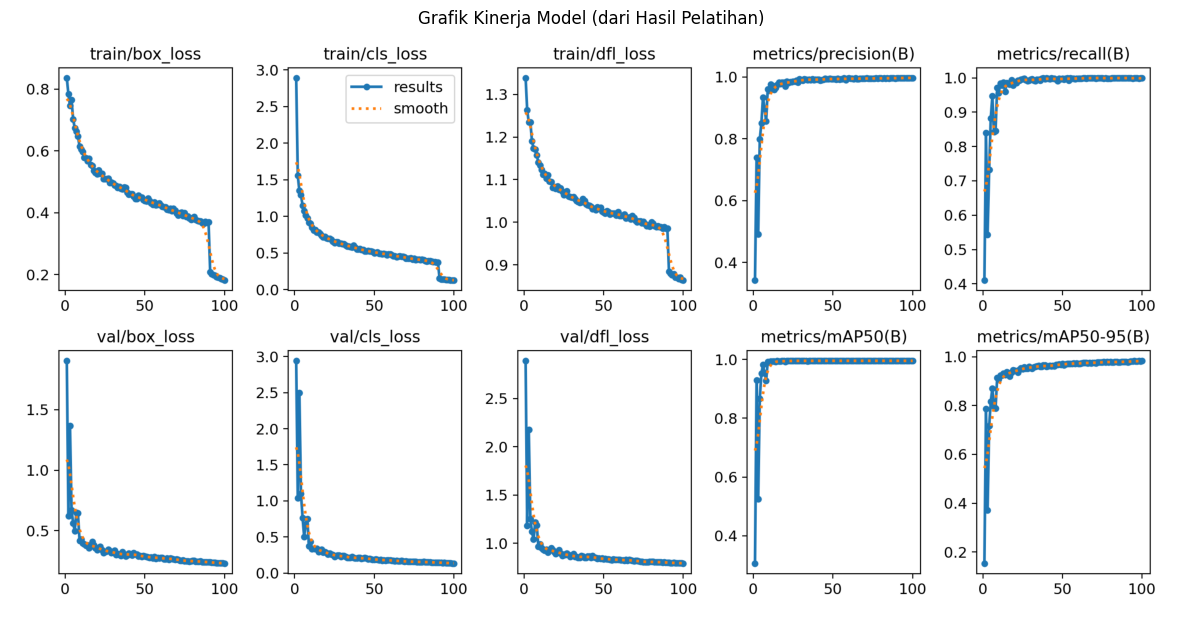

In [15]:
# Bagian 3: Grafik Kinerja Model (dari Training Logs)
# ----------------------------------------------------------------------------------
# Asumsikan folder training adalah parent dari folder 'weights' tempat best.pt berada
if os.path.exists(BEST_MODEL_PATH):
    training_run_dir = os.path.dirname(os.path.dirname(BEST_MODEL_PATH)) # contoh: ./SignLanguageDetection_SIBI/yolov8s_alfabet_sibi_v1_100epochs
    results_png_path = os.path.join(training_run_dir, "results.png")
    results_csv_path = os.path.join(training_run_dir, "results.csv")

    if os.path.exists(results_png_path):
        print(f"\nMenampilkan Grafik Kinerja (results.png) dari: {results_png_path}")
        try:
            img_results = Image.open(results_png_path)
            plt.figure(figsize=(15, 10))
            plt.imshow(img_results)
            plt.axis('off')
            plt.title("Grafik Kinerja Model (dari Hasil Pelatihan)")
            plt.show()
        except Exception as e:
            print(f"Gagal menampilkan gambar results.png: {e}")

    elif os.path.exists(results_csv_path):
        print(f"\nMemproses Grafik Kinerja dari: {results_csv_path}")
        try:
            df_results = pd.read_csv(results_csv_path)
            df_results.columns = df_results.columns.str.strip() # Membersihkan spasi nama kolom

            plt.figure(figsize=(18, 12)) # Ukuran figure lebih besar

            # Plot Box Loss
            plt.subplot(2, 3, 1)
            if 'train/box_loss' in df_results.columns and 'val/box_loss' in df_results.columns:
                plt.plot(df_results['epoch'], df_results['train/box_loss'], label='Train Box Loss')
                plt.plot(df_results['epoch'], df_results['val/box_loss'], label='Val Box Loss')
                plt.xlabel("Epoch")
                plt.ylabel("Box Loss")
                plt.title("Box Loss vs. Epoch")
                plt.legend()
            else:
                plt.text(0.5, 0.5, 'Data Box Loss tidak tersedia', ha='center', va='center')


            # Plot Classification Loss
            plt.subplot(2, 3, 2)
            if 'train/cls_loss' in df_results.columns and 'val/cls_loss' in df_results.columns:
                plt.plot(df_results['epoch'], df_results['train/cls_loss'], label='Train Cls Loss')
                plt.plot(df_results['epoch'], df_results['val/cls_loss'], label='Val Cls Loss')
                plt.xlabel("Epoch")
                plt.ylabel("Classification Loss")
                plt.title("Classification Loss vs. Epoch")
                plt.legend()
            else:
                plt.text(0.5, 0.5, 'Data Cls Loss tidak tersedia', ha='center', va='center')

            # Plot DFL Loss
            plt.subplot(2, 3, 3)
            if 'train/dfl_loss' in df_results.columns and 'val/dfl_loss' in df_results.columns:
                plt.plot(df_results['epoch'], df_results['train/dfl_loss'], label='Train DFL Loss')
                plt.plot(df_results['epoch'], df_results['val/dfl_loss'], label='Val DFL Loss')
                plt.xlabel("Epoch")
                plt.ylabel("DFL Loss")
                plt.title("DFL Loss vs. Epoch")
                plt.legend()
            else:
                plt.text(0.5, 0.5, 'Data DFL Loss tidak tersedia', ha='center', va='center')


            # Plot mAP50-95 dan mAP50
            plt.subplot(2, 3, 4)
            if 'metrics/mAP50-95(B)' in df_results.columns and 'metrics/mAP50(B)' in df_results.columns:
                plt.plot(df_results['epoch'], df_results['metrics/mAP50-95(B)'], label='mAP50-95')
                plt.plot(df_results['epoch'], df_results['metrics/mAP50(B)'], label='mAP50')
                plt.xlabel("Epoch")
                plt.ylabel("mAP Score")
                plt.title("mAP vs. Epoch")
                plt.legend()
            else:
                plt.text(0.5, 0.5, 'Data mAP tidak tersedia', ha='center', va='center')


            # Plot Precision
            plt.subplot(2, 3, 5)
            if 'metrics/precision(B)' in df_results.columns:
                plt.plot(df_results['epoch'], df_results['metrics/precision(B)'], label='Precision')
                plt.xlabel("Epoch")
                plt.ylabel("Precision")
                plt.title("Precision vs. Epoch")
                plt.legend()
            else:
                plt.text(0.5, 0.5, 'Data Precision tidak tersedia', ha='center', va='center')

            # Plot Recall
            plt.subplot(2, 3, 6)
            if 'metrics/recall(B)' in df_results.columns:
                plt.plot(df_results['epoch'], df_results['metrics/recall(B)'], label='Recall')
                plt.xlabel("Epoch")
                plt.ylabel("Recall")
                plt.title("Recall vs. Epoch")
                plt.legend()
            else:
                plt.text(0.5, 0.5, 'Data Recall tidak tersedia', ha='center', va='center')


            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Gagal membuat grafik dari CSV: {e}")
    else:
        print(f"File results.png atau results.csv tidak ditemukan di direktori training: {training_run_dir}")
else:
    print("\nPath ke model terbaik tidak valid, tidak dapat menemukan log pelatihan.")


--- Pengujian dengan Gambar Baru ---
Masukkan path ke gambar baru untuk diuji (atau tekan Enter untuk melewati): /content/A (4).jpg
Melakukan prediksi pada: /content/A (4).jpg

image 1/1 /content/A (4).jpg: 640x640 1 A, 16.6ms
Speed: 4.1ms preprocess, 16.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

Menampilkan gambar dengan deteksi:


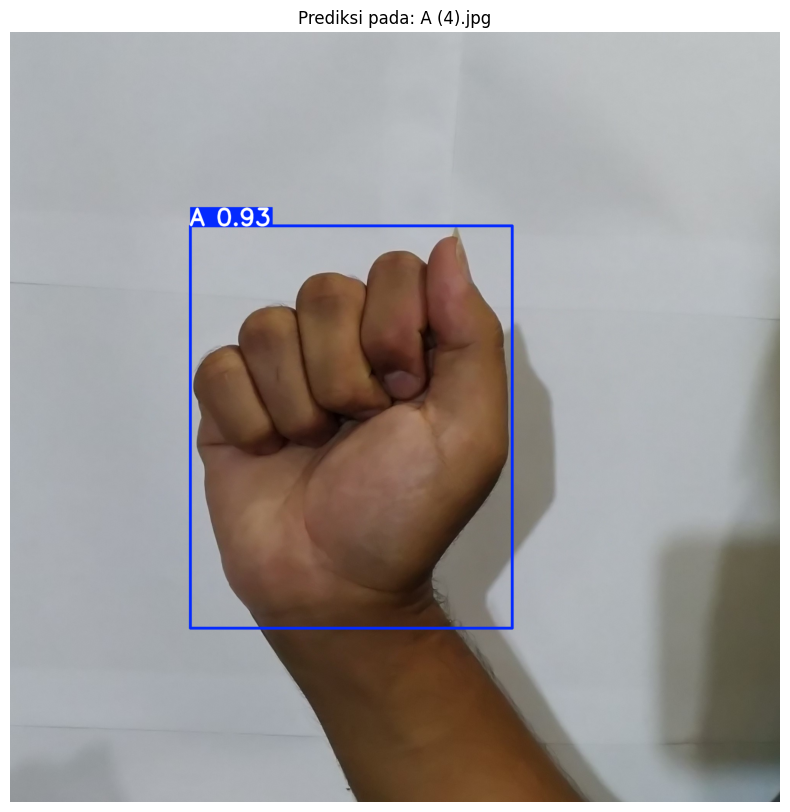


Detail Deteksi:
  Objek: A, Confidence: 0.93
    BBox (pixel): [468.06, 503.39, 1304.12, 1548.38]


In [22]:
# Pengujian dengan Memasukkan Gambar Baru (Tanpa Menyimpan Hasil Prediksi ke File)

if model:
    print("\n--- Pengujian dengan Gambar Baru ---")
    new_image_path_input = input("Masukkan path ke gambar baru untuk diuji (atau tekan Enter untuk melewati): ").strip()

    if not new_image_path_input:
        print("Tidak ada path gambar yang dimasukkan, pengujian gambar baru dilewati.")
    elif os.path.exists(new_image_path_input):
        try:
            print(f"Melakukan prediksi pada: {new_image_path_input}")
            results = model.predict(
                source=new_image_path_input,
                imgsz=IMG_SIZE,
                conf=CONF_THRESHOLD,
                save=False,
                save_txt=False,
            )

            # Menampilkan hasil prediksi langsung dari objek 'results'
            if results: # results adalah list dari objek Result
                for r in results: # Iterasi melalui setiap hasil (biasanya hanya satu untuk satu gambar)
                    if r.boxes.shape[0] > 0: # Cek apakah ada deteksi
                        print("\nMenampilkan gambar dengan deteksi:")
                        # r.plot() menghasilkan gambar dengan anotasi sebagai array NumPy (format BGR)
                        annotated_image_bgr = r.plot()

                        # Konversi BGR ke RGB untuk tampilan yang benar dengan Matplotlib
                        annotated_image_rgb = annotated_image_bgr[:, :, ::-1]

                        plt.figure(figsize=(10, 10))
                        plt.imshow(annotated_image_rgb)
                        plt.axis('off')
                        plt.title(f"Prediksi pada: {os.path.basename(new_image_path_input)}")
                        plt.show()

                        print("\nDetail Deteksi:")
                        for box in r.boxes:
                            class_id = int(box.cls)
                            class_name = model.names[class_id] # Mengambil nama kelas dari model
                            confidence = float(box.conf)
                            # Koordinat [xmin, ymin, xmax, ymax]
                            # bbox_normalized = box.xyxyn[0].tolist() # Koordinat ternormalisasi
                            bbox_pixel = box.xyxy[0].tolist() # Koordinat pixel

                            print(f"  Objek: {class_name}, Confidence: {confidence:.2f}")
                            print(f"    BBox (pixel): [{', '.join(f'{coord:.2f}' for coord in bbox_pixel)}]")
                    else:
                        print("Tidak ada objek yang terdeteksi pada gambar ini dengan confidence threshold saat ini.")
                        # Tetap tampilkan gambar asli jika tidak ada deteksi
                        try:
                            from PIL import Image as PIL_Image # Impor spesifik untuk kasus ini jika belum global
                            original_image = PIL_Image.open(new_image_path_input)
                            plt.figure(figsize=(8,8))
                            plt.imshow(original_image)
                            plt.title(f"Gambar Asli (tidak ada deteksi): {os.path.basename(new_image_path_input)}")
                            plt.axis('off')
                            plt.show()
                        except ImportError:
                            print("Pillow (PIL) library tidak ditemukan untuk menampilkan gambar asli.")
                        except Exception as e_img:
                            print(f"Gagal menampilkan gambar asli: {e_img}")

            else:
                print("Prediksi tidak menghasilkan output.")

        except Exception as e:
            print(f"Error saat melakukan prediksi pada gambar baru: {e}")
    else:
        print(f"File gambar tidak ditemukan di path: {new_image_path_input}")

else:
    print("Model tidak dimuat, pengujian dengan gambar baru dilewati.")